## 09/12/2025----Multi Variant Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path=r"C:\Users\SNEHA\OneDrive\Desktop\DS_My notes\categorical pro\VisaDataset.csv"
visa_df=pd.read_csv(file_path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [3]:
cat=visa_df.select_dtypes(include=['object', 'category']).columns
num=visa_df.select_dtypes(include=['int64', 'float64']).columns




In [4]:
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [5]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [6]:
visa_df['continent']

0          Asia
1          Asia
2          Asia
3          Asia
4        Africa
          ...  
25475      Asia
25476      Asia
25477      Asia
25478      Asia
25479      Asia
Name: continent, Length: 25480, dtype: object

In [7]:
visa_df['case_status'].value_counts()

Certified    17018
Denied        8462
Name: case_status, dtype: int64

- there are total 25480 applicants are there

- In that 25480 applicants 17018 got the Visa

- 8462 aplications did not get the visa

- Also there are 16861 applicants are applied for the Visa from ASia

- we want to know how many applications from asia got certified

- and how many appplicants from asia got denied

In [8]:
# Attack the contient data and caseStatus

#S-1: Selct continent data
#S-2: continent data == "Asia" it is cond1
#S-2: seelct the cseStatus data == 'certified' is con2
#S-3: con=con1&con2
#S-6: apply main data frame df on con get the len

In [9]:

con1=visa_df['continent']=="Asia"
visa_df['case_status']
con2=visa_df['case_status']=='Certified'

con=con1&con2
len(visa_df[con])


11012

In [10]:
visa_df['case_status']

0           Denied
1        Certified
2           Denied
3           Denied
4        Certified
           ...    
25475    Certified
25476    Certified
25477    Certified
25478    Certified
25479    Certified
Name: case_status, Length: 25480, dtype: object

In [11]:
# from difernt continents how many people are certified

labels=visa_df['continent'].unique()

for i in labels:
    con1=visa_df['continent']==i

    con2=visa_df['case_status']=='Certified'

    con=con1&con2
    print(len(visa_df[con]))

    
# asia, africa, europe, 

11012
397
2037
2957
493
122


In [12]:
labels=visa_df['continent'].unique()
certi_count=[]
deni_count=[]


for i in labels:
    con1=visa_df['continent']==i

    con2=visa_df['case_status']=='Certified'

    con3=visa_df['case_status']=='Denied'
    cert_con=con1&con2
    den_con=con1&con3
    
    certi_count.append(len(visa_df[cert_con]))
    deni_count.append(len(visa_df[den_con]))
    
cols=sorted(visa_df['case_status'].unique())
print(cols)
pd.DataFrame(zip(certi_count,deni_count),columns=cols,index=labels)


#sorted Alphabetical order
# here itbis mostly focused on values and there count

['Certified', 'Denied']


,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


## Cross Tab

In [13]:
#pd.crosstab(<index>,<columns>)

col1=visa_df['continent']
col2=visa_df['case_status']
pd.crosstab(col1,col2)

# so above code and crosstab is used for alaphabectical order

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


In [14]:
col1=visa_df['continent']
col2=visa_df['case_status']
r1=pd.crosstab(col1,col2)
r1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<AxesSubplot:xlabel='continent'>

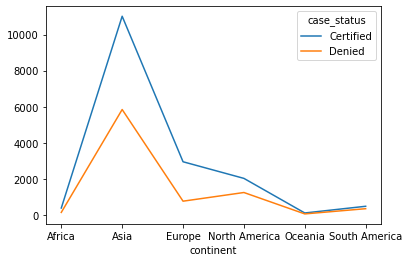

In [15]:
r1.plot()

#default kind ==line

<AxesSubplot:xlabel='continent'>

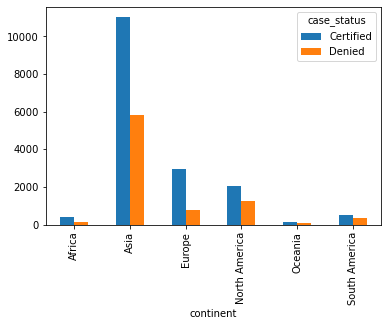

In [16]:
r1.plot(kind='bar')

**3 cols----case status col, continent, education of employe**

In [17]:
# from asia thre 16k applications applied for visa
#    in that 11k+ got certified
#    in that 11k pepole diif eductaion applicants are available
#we those information

In [18]:
# pd.crosstab(<index>,<colums>)

col1=visa_df['continent']
col2=visa_df['case_status']
col3=visa_df['education_of_employee']
cols=[col2,col3]
r2=pd.crosstab(col1,cols)

# best approach

<AxesSubplot:xlabel='continent'>

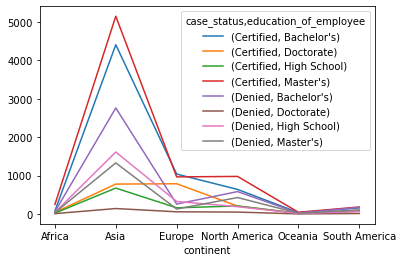

In [19]:
r2.plot()

In [20]:
col1=visa_df['continent']
col2=visa_df['case_status']
col3=visa_df['education_of_employee']
cols=[col1,col2]
pd.crosstab(col3,cols)

continent                Africa             Asia           Europe         \
case_status           Certified Denied Certified Denied Certified Denied   
education_of_employee                                                      
Bachelor's                   81     62      4407   2761      1040    259   
Doctorate                    43     11       780    143       788     58   
High School                  23     43       676   1614       162    328   
Master's                    250     38      5149   1331       967    130   

continent             North America          Oceania        South America  \
case_status               Certified Denied Certified Denied     Certified   
education_of_employee                                                       
Bachelor's                      641    584        38     28           160   
Doctorate                       207     51        19      3            75   
High School                     210    191        19     17            74   
Master's                        979    429        46     22           184   

continent                     
case_status           Denied  
education_of_employee         
Bachelor's               173  
Doctorate                 14  
High School               63  
Master's                 109

In [21]:
col1=visa_df['continent']
col2=visa_df['case_status']
col3=visa_df['education_of_employee']
cols=[col1,col2]
pd.crosstab(col3,cols)

continent                Africa             Asia           Europe         \
case_status           Certified Denied Certified Denied Certified Denied   
education_of_employee                                                      
Bachelor's                   81     62      4407   2761      1040    259   
Doctorate                    43     11       780    143       788     58   
High School                  23     43       676   1614       162    328   
Master's                    250     38      5149   1331       967    130   

continent             North America          Oceania        South America  \
case_status               Certified Denied Certified Denied     Certified   
education_of_employee                                                       
Bachelor's                      641    584        38     28           160   
Doctorate                       207     51        19      3            75   
High School                     210    191        19     17            74   
Master's                        979    429        46     22           184   

continent                     
case_status           Denied  
education_of_employee         
Bachelor's               173  
Doctorate                 14  
High School               63  
Master's                 109

**Group By**

In [22]:
visa_df['education_of_employee'].value_counts()


Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64

In [23]:
visa_df['prevailing_wage']

# wages are numercial values
#25480 aplicants are availbale
# diff applicants having the diff wages

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [24]:
visa_df.groupby('education_of_employee')

In [25]:
list(visa_df.groupby('education_of_employee'))

[("Bachelor's",
           case_id      continent education_of_employee has_job_experience  \
  2         EZYV03           Asia            Bachelor's                  N   
  3         EZYV04           Asia            Bachelor's                  N   
  6         EZYV07           Asia            Bachelor's                  N   
  7         EZYV08  North America            Bachelor's                  Y   
  8         EZYV09           Asia            Bachelor's                  N   
  ...          ...            ...                   ...                ...   
  25466  EZYV25467         Europe            Bachelor's                  Y   
  25468  EZYV25469           Asia            Bachelor's                  N   
  25473  EZYV25474           Asia            Bachelor's                  Y   
  25475  EZYV25476           Asia            Bachelor's                  Y   
  25479  EZYV25480           Asia            Bachelor's                  Y   
  
        requires_job_training  no_of_employee

In [26]:
visa_df.groupby('education_of_employee').count()

,case_id,continent,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
education_of_employee,,,,,,,,,,,
Bachelor's,10234,10234,10234,10234,10234,10234,10234,10234,10234,10234,10234
Doctorate,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192
High School,3420,3420,3420,3420,3420,3420,3420,3420,3420,3420,3420
Master's,9634,9634,9634,9634,9634,9634,9634,9634,9634,9634,9634


In [27]:
visa_df.groupby('education_of_employee').size()
# size of each group

education_of_employee
Bachelor's     10234
Doctorate       2192
High School     3420
Master's        9634
dtype: int64

In [28]:
#select a particular data

visa_df.groupby('education_of_employee')['prevailing_wage']

In [29]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [30]:
#avg salary of all bachelors---> doctors,masters..

visa_df['prevailing_wage'].mean()


74455.81459209221

In [31]:
visa_df[visa_df['education_of_employee']=="Bachelor's"]['prevailing_wage'].mean()

73405.44373546989

In [32]:
visa_df.groupby('education_of_employee')['prevailing_wage'].mean()

education_of_employee
Bachelor's     73405.443735
Doctorate      64561.076657
High School    71582.147756
Master's       78843.057843
Name: prevailing_wage, dtype: float64

In [33]:
visa_df.groupby('continent').size()

continent
Africa             551
Asia             16861
Europe            3732
North America     3292
Oceania            192
South America      852
dtype: int64

In [34]:
# multi variant , bi variant van be done by GroupBy
con=visa_df['case_status']=='Certified'  #condition
new_df=visa_df[con]
visa_df.groupby('continent').size()  # takin gnew data and applying group by

continent
Africa             551
Asia             16861
Europe            3732
North America     3292
Oceania            192
South America      852
dtype: int64

In [35]:
con=visa_df['case_status']=='Denied'  #condition
new_df=visa_df[con]
visa_df.groupby('continent').size()

continent
Africa             551
Asia             16861
Europe            3732
North America     3292
Oceania            192
South America      852
dtype: int64

In [36]:
# I want to know min wage of asia people

visa_df['prevailing_wage'].min()
con=visa_df['continent']=='Asia'
new_df=visa_df[con]
new_df['prevailing_wage'].min()

3.3188

In [37]:
visa_df.groupby('continent')['prevailing_wage'].min()

continent
Africa           32.9286
Asia              3.3188
Europe            9.1753
North America     2.1367
Oceania          24.4888
South America     3.0031
Name: prevailing_wage, dtype: float64

## 10/12/2025

- we have seen continent and case_status

- we have seen three varaiables **continent, case_status, Education of Employee**

- we also done similar analysis using group

- only categorical column analysis completed

- also Bivariate and multivariavte anlaysis completed

- Now we need to perform Two numerical co,umn analysis

    - this will give relation between two columns which are numerical in value
    
    - So we can perform **Correlation matrix** tok get relationship
    
    - also we nned to perform **Scatter plot** to visualize the relation

**Plt.Scatter**

In [38]:
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [39]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

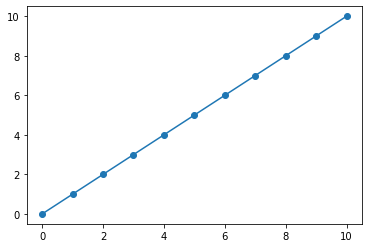

In [40]:
x=range(0,11)
y=range(0,11)
plt.scatter(x,y)
plt.plot(x,y)

ValueError: x and y must be the same size

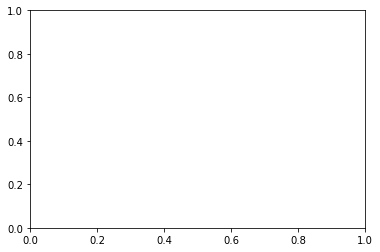

In [41]:
x=range(0,11)
y=range(10,1,-1)
plt.scatter(x,y)
plt.plot(x,y)

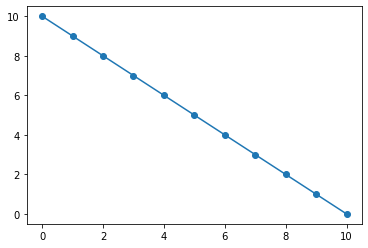

In [42]:
x=range(0,11)  #0-10
y=range(10,-1,-1)  #start, stop, decre/step

plt.scatter(x,y)
plt.plot(x,y)

#(0,10), (1,9), (3,7).....
#x--increasing
#y--decreasing

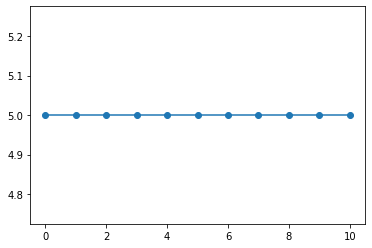

In [44]:
x=range(0,11)  #0-10
y=[5 for i in range(0,11)] #y=[5,5,5,5,5,5] ---> 0,5  1,5   2,5  3,5...
plt.scatter(x,y)
plt.plot(x,y)

#y-- should in list to get straight line

In [45]:
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [46]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**relation b/w cat and num -----> correlation**

In [47]:
visa_df.corr()

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


In [65]:
visa_df.corr(numeric_only=True)

TypeError: corr() got an unexpected keyword argument 'numeric_only'

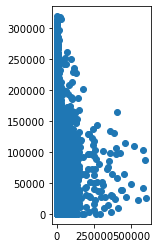

In [51]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
col3=visa_df['prevailing_wage']
plt.subplot(1,3,1).scatter(col1,col3)

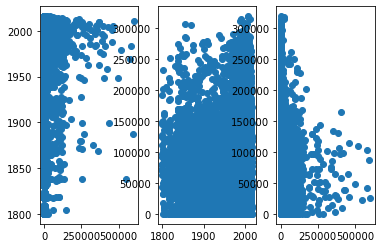

In [54]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
col3=visa_df['prevailing_wage']
plt.subplot(1,3,1).scatter(col1,col2)
plt.subplot(1,3,2).scatter(col2,col3)
plt.subplot(1,3,3).scatter(col1,col3)

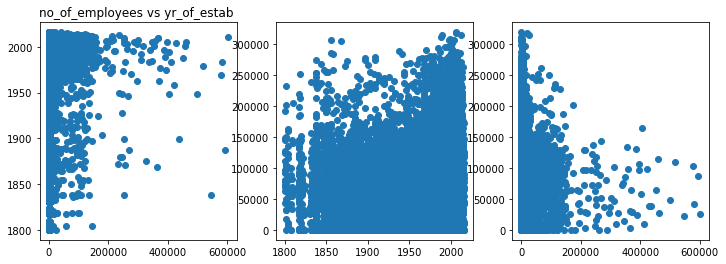

In [56]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
col3=visa_df['prevailing_wage']
plt.figure(figsize=(12,4))

plt.subplot(1,3,1).scatter(col1,col2)
plt.title('no_of_employees vs yr_of_estab ')
plt.subplot(1,3,2).scatter(col2,col3)
plt.subplot(1,3,3).scatter(col1,col3)

In [57]:
file_path1=r"C:\Users\SNEHA\OneDrive\Desktop\DS_My notes\categorical pro\winequality_red.csv"
wine_df=pd.read_csv(file_path1)
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [61]:
cat=wine_df.select_dtypes(include=['object','category']).columns
num=wine_df.select_dtypes(exclude=['object','category']).columns

In [62]:
cat

Index([], dtype='object')

In [63]:
num

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [64]:
wine_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


# **Heat Map**

- Any matrix values we can visualise using heat map

- heat map will provide colors for differnt values

- heat map also provides colors bar which indicates, the colur and its value

- Foe ex:  the values ranges from 0.8 to 1 display as **Blue color**

- so we no need to check values, we can directly see the blue color

- so immmediatly we can sence blue color meands highest value

- heat map availbale in Seaborn --sns

<AxesSubplot:>

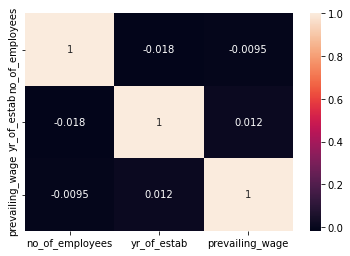

In [71]:
visa_corr=visa_df.corr()
sns.heatmap(visa_corr,annot=True)

**Correlation**

- it is b/w -1 to +1

- -1 to 0 --> negative correlation

- +1 to 0 --> positive correlation

- 0--> no correlation

<AxesSubplot:>

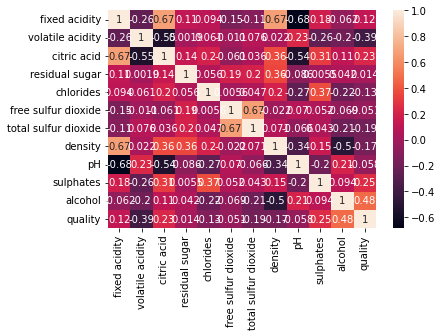

In [72]:
wine_corr=wine_df.corr()
sns.heatmap(wine_corr,annot=True)

<AxesSubplot:>

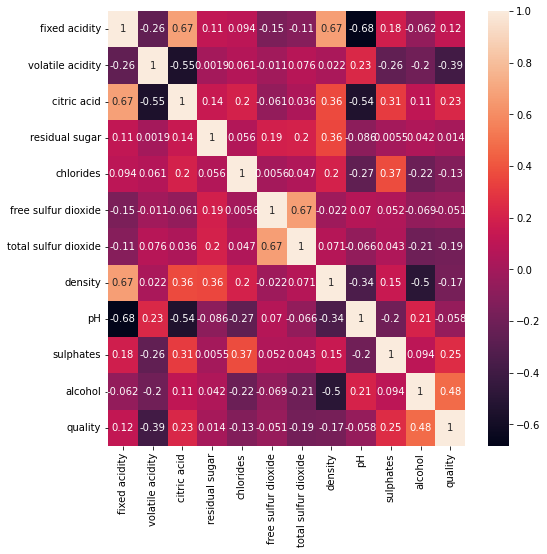

In [74]:
wine_corr=wine_df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(wine_corr,annot=True)

In [75]:
num

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [77]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

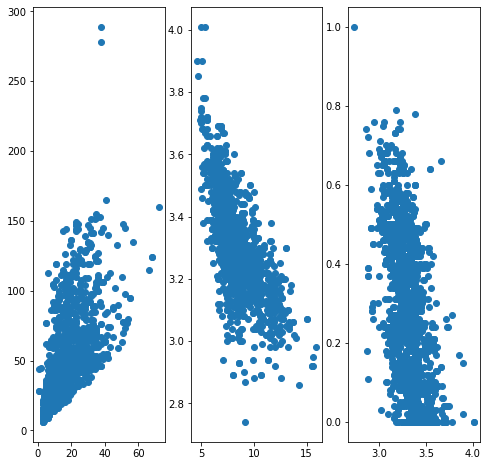

In [81]:
col1=wine_df['free sulfur dioxide']
col2=wine_df['total sulfur dioxide']
col3=wine_df['fixed acidity']
col4=wine_df['pH']
col5=wine_df['citric acid']
plt.figure(figsize=(8,8))
plt.subplot(1,3,1).scatter(col1,col2)
plt.subplot(1,3,2).scatter(col3,col4)
plt.subplot(1,3,3).scatter(col4,col5)
